<a href="https://colab.research.google.com/github/konathalayashwanth/Fundamental/blob/main/Hand_written_Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Library**

In [ ]:
[1] import pandas as pd

[2] import numpy as np

[3] import matplotlib.pyplot as plt

## **Import Data**

In [ ]:
[4] from sklearn.datasets import load_digits

[5] df = load_digits()

[6] _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
    for ax, image, label in zip(axes, df.images, df.target):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("Training: %i" % label)

Training:0
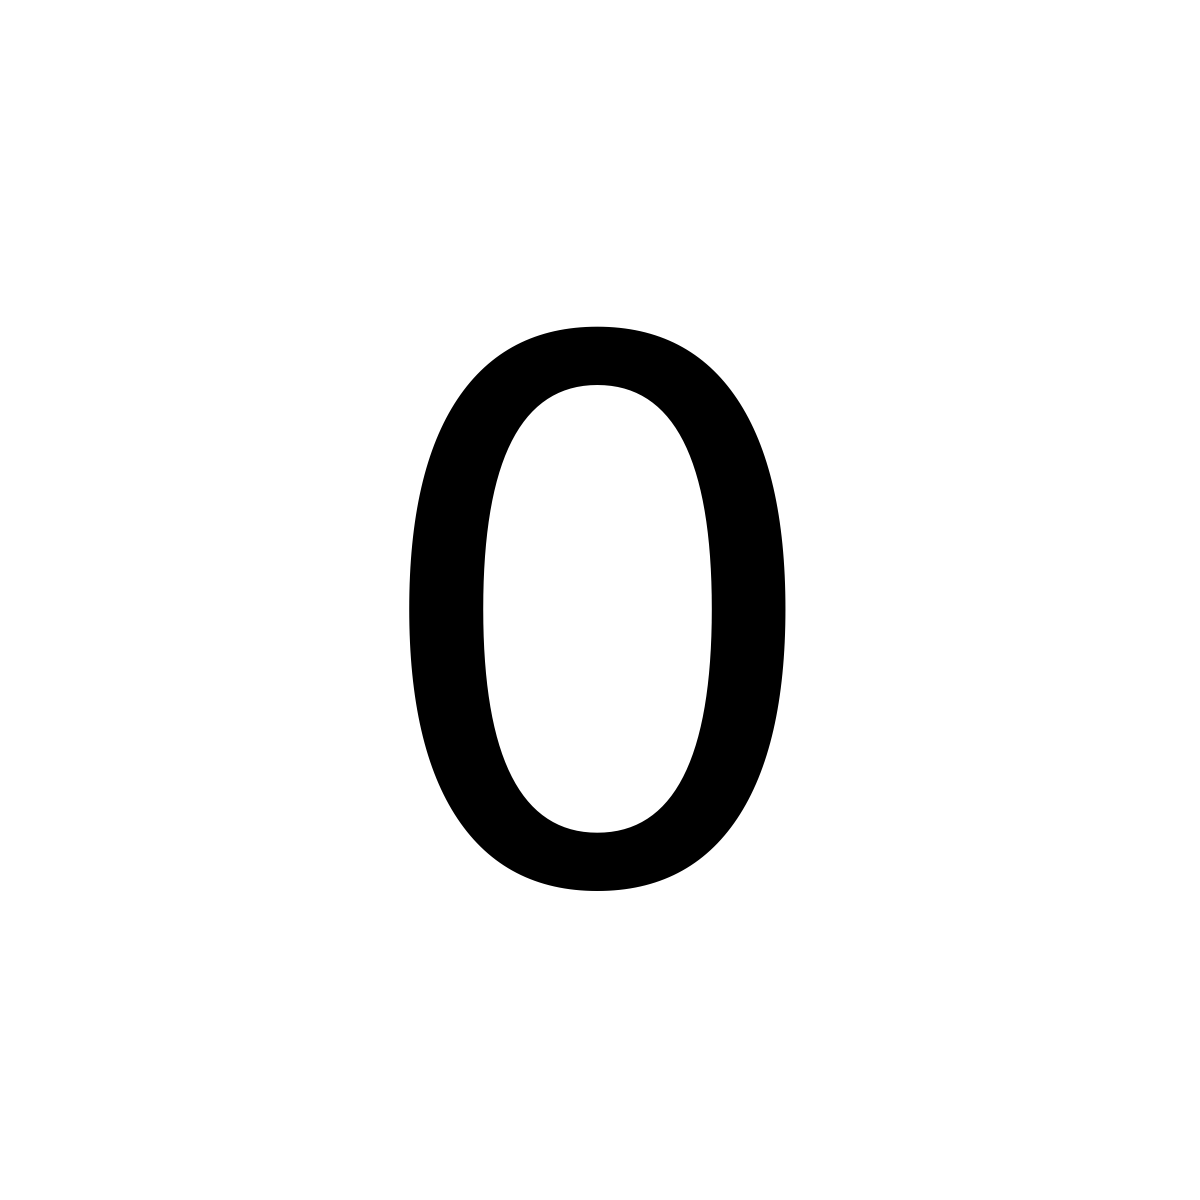

Training:1
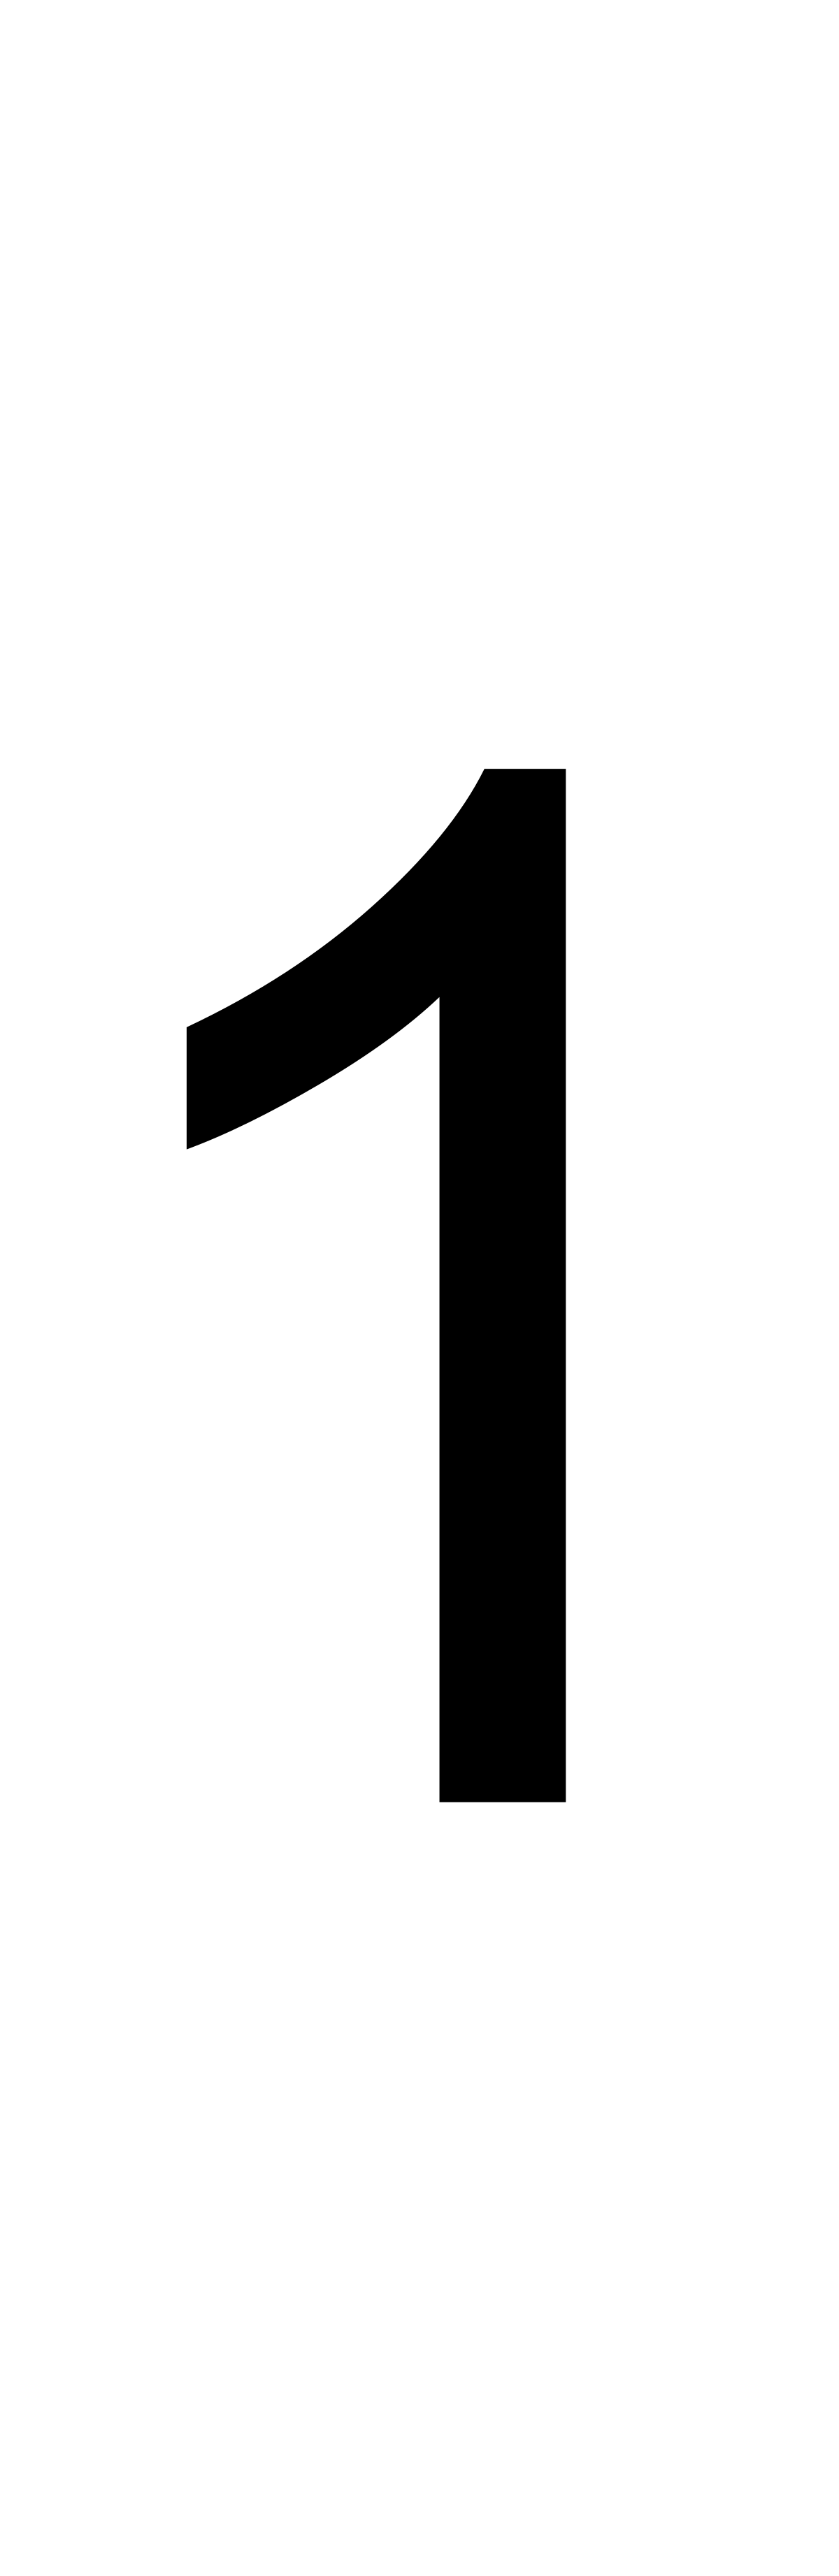

Training:2
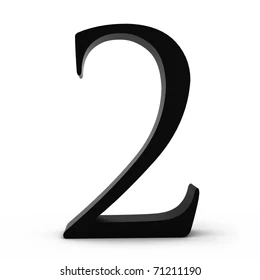

Training:3
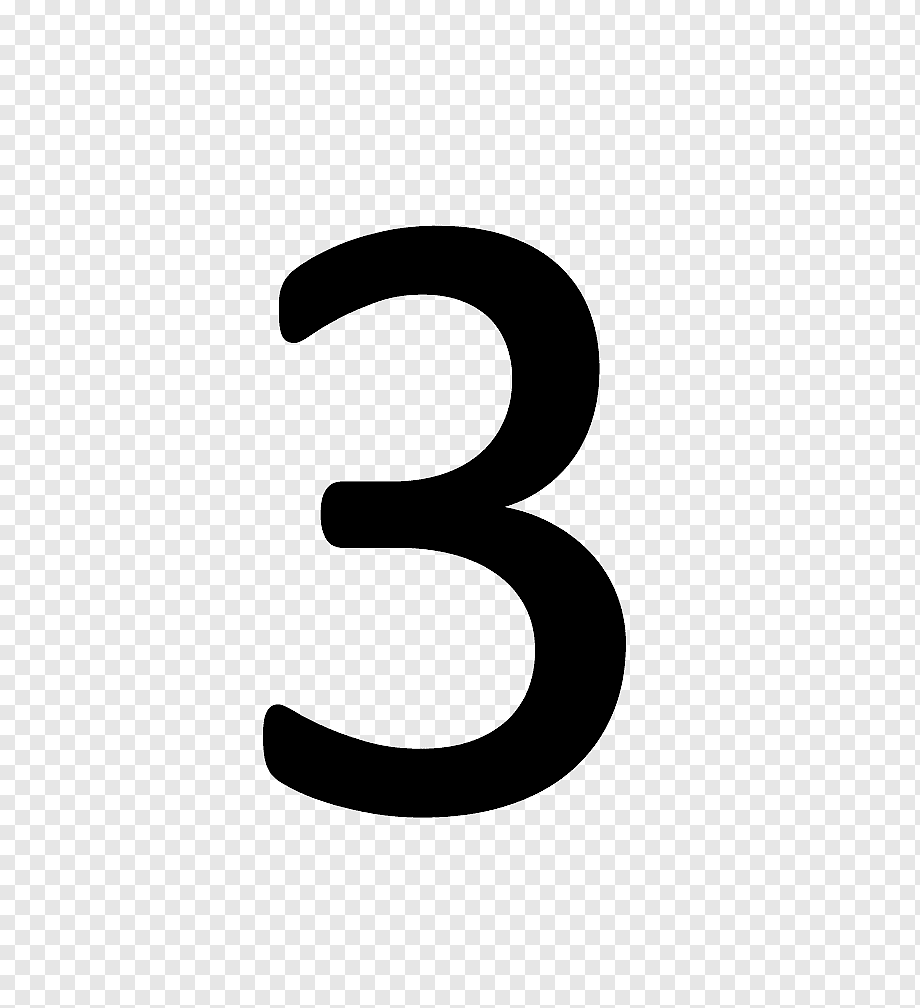

## **Data Processing**

Flatten image: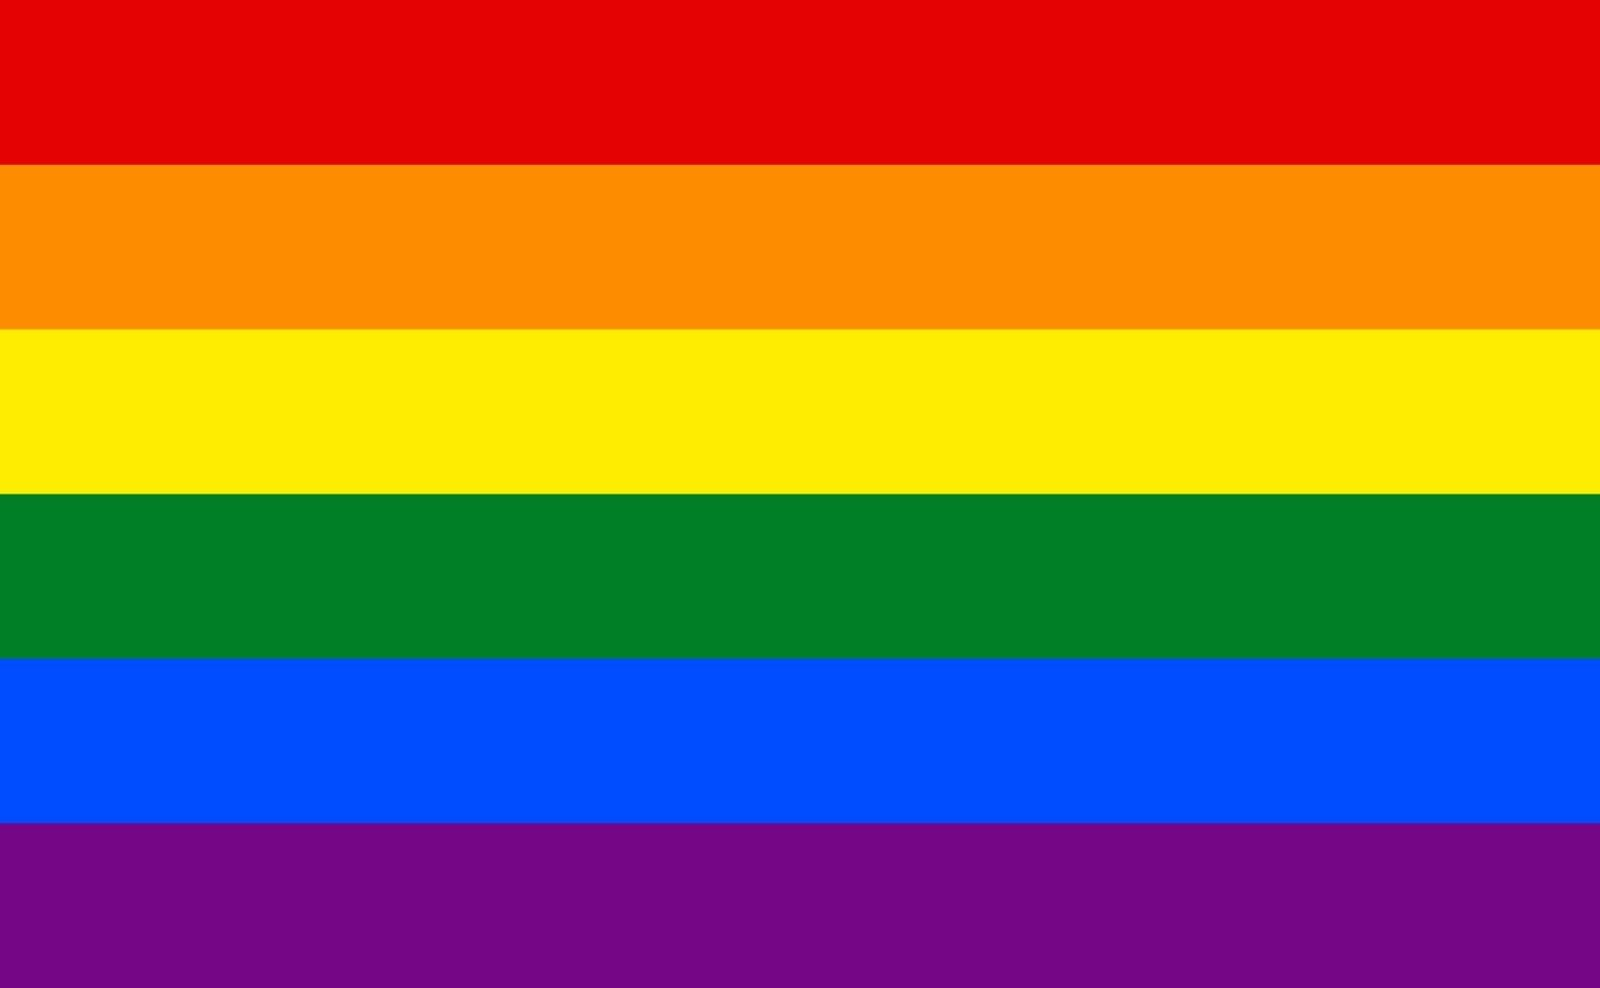

In [ ]:
[7] df.images.shapes

         (1797, 8, 8)

In [ ]:
[8] df.images[0]

     array([ 0.,  0.,  5., 13., 9., 1., 0., 0.],
           [ 0., 0., 13., 15., 10., 15., 5., 0],
           [ 0., 3., 15., 2., 0.,  11., 8., 0.],
           [ 0., 4., 12., 0., 0.,  8., 8.,  0.],
           [ 0., 5.,  8., 0.,  0., 9.,  8., 0.],
           [ 0., 4., 11., 0., 1., 12.,  7., 0.],
           [ 0., 2., 14., 5., 10., 12., 0., 0.],
           [ 0., 0., 6., 13., 10., 0.,  0., 0.],

In [ ]:
[9] df.images[0].shape

        (8, 8)

In [ ]:
[10] len(df.images)

          1797

In [ ]:
[11] n_samples = len(df.images)
     data = df.images.reshape((n_samples, -1))

In [ ]:
[12] data[0]

           array([ 0., 0., 5., 13., 9., 1., 0., 0., 0., 0., 13., 15., 10.,
                   15., 5., 0., 0., 3., 15., 2., 0., 11., 8., 0., 0., 4.,
                   12., 0., 0., 8., 8., 0., 0., 5.,  8.,  0., 0., 9., 8.,
                   0., 0., 4., 11., 0., 1., 12., 7., 0., 0., 2., 14., 5., 
                   10., 12., 0., 0., 0., 0., 6., 13., 10., 0., 0., 0.,]) 


In [ ]:
[13] data[0].shape

          (64,)

In [ ]:
[14] data.shape

          (1797, 64)

## **Scaling Image Data**

In [ ]:
[15] data.min()

           0.0

In [ ]:
[16] data.max()

          16.0

In [ ]:
[17] data = data/16

In [ ]:
[18] data.min()

          0.0

In [ ]:
[19] data.max()

          1.0

In [ ]:
[20] data[0]

          array([0.    , 0.     , 0.3125, 0.8125, 0.5625, 0.0625, 0.   , 0.   ,
                 0.    , 0.     , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125,0.   ,
                 0.    , 0.1875 ,  0.9375, 0.125 ,     0. 0.6875,  0.5 , 0.   ,
                 0.    , 0.25   , 0.75  , 0.    , 0.   , 0.5  ,          0.   ,
                 0.    , 0.3125, 0.5 , 0.  , 0.    , 0.5625,  0.5 ,      0.   ,
                 0.    , 0.25  , 0.6875, 0.   , 0.0625,  0.75,  0.4375,  0.   ,
                 0.    , 0.125 , 0.875 , 0.3125, 0.0625 , 0.75 ,  0.    ,0.   ,
                 0.    ,0.    ,0.375 , 0.8125, 0.625 , 0.   , 0.    ,    0.   )]

## **Train Test Split Data**

In [ ]:
[21] from sklearn.ensemble import RandomForestClassifier

[22] X_train, X_test, y_test = train_test_split(data, df.target, test_size=0.3)

[23] X_train.shape, X_test.shape, y_train.shape, y_test.shape

          ((1257, 64), (540, 64), (1257,), (540,))

## **Random Forest Model**

In [ ]:
[24] from sklearn,ensemble import RandomForestClassifier

[25] rf = RandomForestclassifier()

[26] rf.fit(X_train, y_train)

     RandomForestClassifier()
     

## **predict Test Data**

In [ ]:
[27] y_pred = rf.predict(X_test)

[28] y_pred

          array([6, 5, 2, 6, 8, 8, 2, 7, 5, 1, 1, 4, 3, 7, 2, 0, 0, 7, 0, 2, 5,
                 2, 5, 2, 7, 5, 7, 7, 9, 0, 9, 9, 4, 4, 3, 2, 5, 4, 1, 3, 3, 9,
                 4, 4, 5, 5, 6, 6, 7, 6, 0, 0, 5, 4, 3, 4, 2, 5, 3, 5, 0, 3, 2,
                 3, 4, 0, 3, 3, 0, 5, 6, 8, 6, 7, 8, 5, 6, 4, 5, 7, 2, 0, 3, 1,
                 2, 2, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 5, 4, 2, 3, 4, 6, 0, 5, 1,
                 3, 3, 5, 5, 9, 4, 5, 6, 6, 9, 5, 6, 6, 8, 8, 9, 0,  5, 7, 6, 1
                 2, 4, 5, 6, 7, 7, 8, 8, 9, 0, 3, 6, 4, 7, 8, 8, 8, 4, ,7, 8, 9
                 4, 6, 5, 6, 7, 8, 9, 6, 5, 4, 9, 7, 4, 3, 2, 1, 0, 6, 4, 9, 5,
                 5, 4, 5, 4, 7, 2, 3, 5, 5, 6, 6, 7, 8, 6, 9, 6, 8, 0, 0, 4 , 4
                 6, 6, 5, 5, 5, 7, 7, 8, 0, 4, 3, 4, 2, 1, 4, 5, 6, 7, 0, 3, 5,
                 5, 5, 4, 3, 6, 7]) 

## **Model Accuracy**

In [ ]:
[29] from sklearn.metrics import confusion_matrix, classification_report

[30] confusion_matrix(y_test, y_pred)

          array[(60, 0, 0, 0, 1, 0, 0, 0, 0, 0],
               [ 0, 60, 0, 1, 0, 0, 0, 0, 0, 0],
               [ 0, 0, 61, 0, 0, 0, 0, 0, 0, 1],
               [ 0, 0, 0, 54, 0, 0, 0, 1, 0, 0],
               [ 0, 0, 0, 0, 40, 0, 0, 1, 0, 0],
               [ 0, 0, 0, 0, 0, 58, 1, 0, 1, 0],
               [ 0, 1, 0, 0, 1, 0, 50, 0, 0, 0],
               [ 0, 0, 0, 0, 0, 0, 0, 52, 0, 0],
               [ 0, 2, 0, 0, 1, 1, 0, 0, 46, 0],
               [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 45]])

In [ ]:
[31] print(classification_report(y_test, y_pred))


                    precision      recall    f1-score    support

                0       1.00       0.98       0.99         61
                1       0.95       0.98       0.97         61
                2       1.00       0.98       0.99         62
                3       0.98       0.98       0.98         55
                4       0.93       0.98       0.95         41
                5       0.98       0.97       0.97         60
                6       0.98       0.96       0.97         52
                7       0.95       1.00       0.97         52
                8       0.98       0.92       0.95         50
                9       0.98       0.98       0.98         46

        accuracy                        0.97      540
        macro avg      0.97    0.97     0.97      540
        weighted avg   0.97    0.97     0.97      540
